# Lab | Feature engineering

## Import Libraries & Gather Data

In [214]:
import pandas as pd
import numpy as np
import math
import datetime
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.mode.use_inf_as_na = True
warnings.filterwarnings('ignore')

In [215]:
df = pd.read_csv('learningSet.csv')

In [216]:
numerical = df.select_dtypes(np.number)
numerical

,ODATEDW,TCODE,DOB,AGE,NUMCHLD,INCOME,WEALTH1,HIT,MBCRAFT,MBGARDEN,...,FISTDATE,NEXTDATE,TIMELAG,AVGGIFT,CONTROLN,TARGET_B,TARGET_D,HPHONE_D,RFA_2F,CLUSTER2
0,8901,0,3712,60.0,NaN,NaN,NaN,0,NaN,NaN,...,8911,9003.0,4.0,7.741935,95515,0,0.0,0,4,39.0
1,9401,1,5202,46.0,1.0,6.0,9.0,16,0.0,0.0,...,9310,9504.0,18.0,15.666667,148535,0,0.0,0,2,1.0
2,9001,1,0,NaN,NaN,3.0,1.0,2,0.0,0.0,...,9001,9101.0,12.0,7.481481,15078,0,0.0,1,4,60.0
3,8701,0,2801,70.0,NaN,1.0,4.0,2,0.0,0.0,...,8702,8711.0,9.0,6.812500,172556,0,0.0,1,4,41.0
4,8601,0,2001,78.0,1.0,3.0,2.0,60,1.0,0.0,...,7903,8005.0,14.0,6.864865,7112,0,0.0,1,2,26.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,9601,1,0,NaN,NaN,NaN,NaN,0,NaN,NaN,...,9602,NaN,NaN,25.000000,184568,0,0.0,0,1,12.0
95408,9601,1,5001,48.0,1.0,7.0,9.0,1,0.0,0.0,...,9603,NaN,NaN,20.000000,122706,0,0.0,1,1,2.0
95409,9501,1,3801,60.0,NaN,NaN,NaN,0,NaN,NaN,...,9410,9501.0,3.0,8.285714,189641,0,0.0,1,3,34.0
95410,8601,0,4005,58.0,NaN,7.0,NaN,0,NaN,NaN,...,8612,8704.0,4.0,12.146341,4693,1,18.0,1,4,11.0


### 1. Check for null values in the numerical columns.

In [217]:
nulls = numerical.isna().sum()
num_nulls_pct = round(nulls[nulls > 0]*100/len(numerical),2)
num_nulls_pct.sort_values(ascending=False)

RDATE_5     99.99
RAMNT_5     99.99
RAMNT_3     99.75
RDATE_3     99.75
RDATE_4     99.71
            ...  
ADATE_3      2.04
MSA          0.14
ADI          0.14
DMA          0.14
CLUSTER2     0.14
Length: 91, dtype: float64

### 2. Use appropriate methods to clean the columns GEOCODE2, WEALTH1, ADI, DMA,and MSA. Use appropriate EDA technique where ever necessary.

#### GEOCODE2

In [218]:
# check the values
df.GEOCODE2.value_counts(normalize=True, dropna=False)

GEOCODE2
A      0.361422
B      0.298757
D      0.173773
C      0.162705
       0.001960
NaN    0.001383
Name: proportion, dtype: float64

In [219]:
# percent of missing data
(0.001960 + 0.001383)*100

0.3343

> Given there is less than 1% of the nulls and empty values in the GEOCODE2 column, we can simply drop these rows.

In [220]:
# change empty rows to nulls
df.GEOCODE2 = df.GEOCODE2.replace(' ', np.nan, regex=True)

In [221]:
df.GEOCODE2.value_counts(normalize=True, dropna=False)

GEOCODE2
A      0.361422
B      0.298757
D      0.173773
C      0.162705
NaN    0.003343
Name: proportion, dtype: float64

In [222]:
geocode_dropped = df[df.GEOCODE2.isna() == True]
geocode_dropped

,ODATEDW,OSOURCE,TCODE,STATE,ZIP,MAILCODE,PVASTATE,DOB,NOEXCH,RECINHSE,...,TARGET_D,HPHONE_D,RFA_2R,RFA_2F,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,CLUSTER2,GEOCODE2
183,9601,HOS,1002,AP,96326,,,0,0,,...,0.0,0,L,2,F,X,X,X,8.0,NaN
262,8601,SPN,0,AA,34002,,,3705,0,,...,0.0,0,L,2,G,X,X,X,46.0,NaN
399,9201,NEW,1,AP,96251,,,0,0,,...,0.0,0,L,2,G,X,X,X,8.0,NaN
577,8601,BHG,2,FL,33756,,,708,0,,...,0.0,1,L,1,E,X,X,X,NaN,NaN
945,9601,HAM,0,AP,96266,,,0,0,,...,0.0,0,L,1,F,X,X,X,8.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93624,9101,HAN,2,NC,28370,,,1101,0,,...,0.0,0,L,1,F,X,X,X,NaN,NaN
94604,9001,APP,1,AZ,86446,,,0,0,,...,0.0,0,L,2,G,X,X,X,NaN,NaN
94971,9201,HAN,28,AK,99829,,,0,0,,...,0.0,0,L,1,G,X,X,X,15.0,NaN
95019,8901,EAS,0,AP,96206,,,0,0,,...,0.0,0,L,1,F,X,X,X,8.0,NaN


In [223]:
# new df with dropped missing values from the geocode2 column
new_df = df.drop(geocode_dropped.index, axis=0)
new_df

,ODATEDW,OSOURCE,TCODE,STATE,ZIP,MAILCODE,PVASTATE,DOB,NOEXCH,RECINHSE,...,TARGET_D,HPHONE_D,RFA_2R,RFA_2F,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,CLUSTER2,GEOCODE2
0,8901,GRI,0,IL,61081,,,3712,0,,...,0.0,0,L,4,E,X,X,X,39.0,C
1,9401,BOA,1,CA,91326,,,5202,0,,...,0.0,0,L,2,G,X,X,X,1.0,A
2,9001,AMH,1,NC,27017,,,0,0,,...,0.0,1,L,4,E,X,X,X,60.0,C
3,8701,BRY,0,CA,95953,,,2801,0,,...,0.0,1,L,4,E,X,X,X,41.0,C
4,8601,,0,FL,33176,,,2001,0,X,...,0.0,1,L,2,F,X,X,X,26.0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,9601,ASE,1,AK,99504,,,0,0,,...,0.0,0,L,1,G,X,X,X,12.0,C
95408,9601,DCD,1,TX,77379,,,5001,0,,...,0.0,1,L,1,F,X,X,X,2.0,A
95409,9501,MBC,1,MI,48910,,,3801,0,,...,0.0,1,L,3,E,X,X,X,34.0,B
95410,8601,PRV,0,CA,91320,,,4005,0,X,...,18.0,1,L,4,F,X,X,X,11.0,A


#### Numericals

In [224]:
# list of columns to clean
numcol_to_clean = ['WEALTH1', 'ADI', 'DMA', 'MSA']

In [225]:
selected = df[numcol_to_clean]
selected

,WEALTH1,ADI,DMA,MSA
0,NaN,177.0,682.0,0.0
1,9.0,13.0,803.0,4480.0
2,1.0,281.0,518.0,0.0
3,4.0,67.0,862.0,9340.0
4,2.0,127.0,528.0,5000.0
...,...,...,...,...
95407,NaN,0.0,743.0,380.0
95408,9.0,201.0,618.0,3360.0
95409,NaN,61.0,551.0,4040.0
95410,NaN,13.0,803.0,8735.0


In [226]:
selected.describe()

,WEALTH1,ADI,DMA,MSA
count,50680.000000,95280.000000,95280.000000,95280.000000
mean,5.345699,187.356402,664.004072,3527.744102
std,2.742490,137.019184,116.363600,2863.904737
min,0.000000,0.000000,0.000000,0.000000
25%,3.000000,65.000000,561.000000,520.000000
50%,6.000000,175.000000,635.000000,3350.000000
75%,8.000000,279.000000,801.000000,5960.000000
max,9.000000,651.000000,881.000000,9360.000000


> WEALTH1 is discrete and the other 3 are continuous

In [227]:
# check missing values
selected.isna().sum()

WEALTH1    44732
ADI          132
DMA          132
MSA          132
dtype: int64

> Columns ADI, DMA, MSA have very little missing values so they can be dropped.

In [228]:
selected = selected[selected.ADI.isna()==False]

In [229]:
selected.isna().sum()

WEALTH1    44632
ADI            0
DMA            0
MSA            0
dtype: int64

#### WEALTH1

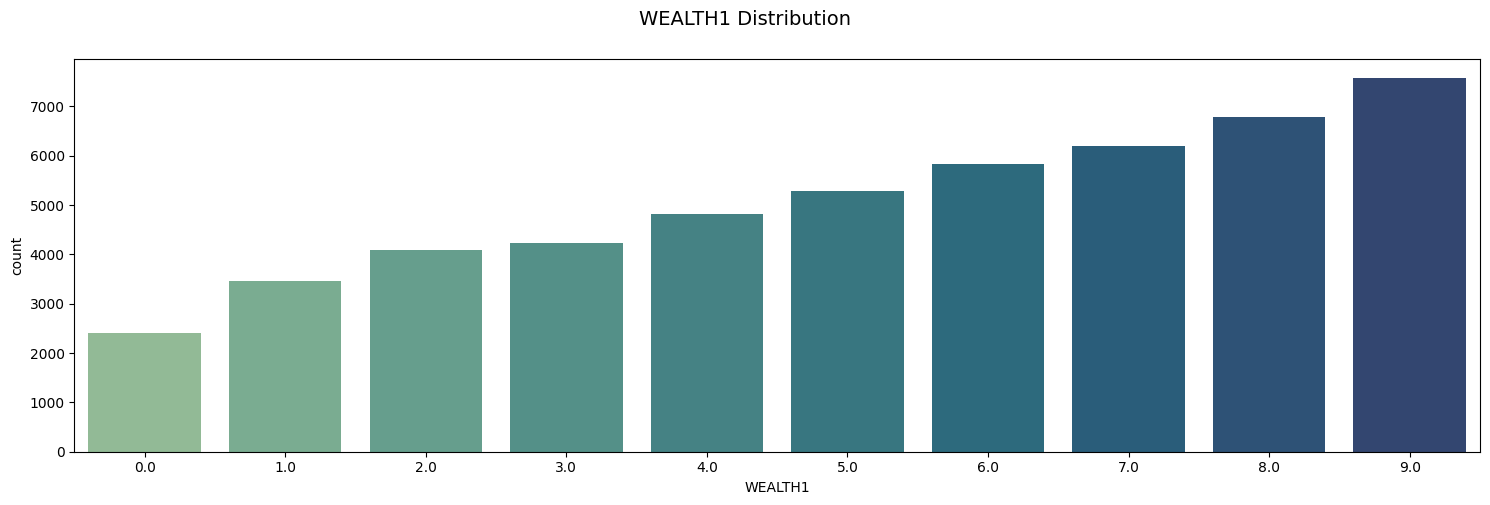

In [230]:
fig = plt.figure(figsize = (15,5))
plt.suptitle("WEALTH1 Distribution", fontsize = 14, y=1)
    
sns.countplot(x = selected.WEALTH1, palette='crest')

plt.tight_layout()
plt.show()

> As there are a lot of null values in this column, we will use a model to predict the missing WEALTH1 values.

**Columns taken to predict WEALTH1**
- IC6 Percent Households w/ Income < $15,000
- IC7 Percent Households w/ Income $15,000 - $24,999
- IC8 Percent Households w/ Income $25,000 - $34,999
- IC9 Percent Households w/ Income $35,000 - $49,999
- IC10 Percent Households w/ Income $50,000 - $74,999
- IC11 Percent Households w/ Income $75,000 - $99,999
- IC12 Percent Households w/ Income $100,000 - $124,999
- IC13 Percent Households w/ Income $125,000 - $149,999
- IC14 Percent Households w/ Income >= $150,000

In [329]:
from sklearn.linear_model import LogisticRegression

In [325]:
classify = LogisticRegression(multi_class='multinomial')

In [315]:
wealth_inc = [col for col in df.columns if 'IC' in col]
wealth_inc = wealth_inc[5:14]

In [314]:
df_wealth = df[wealth_inc].join(df.WEALTH1)
df_wealth

,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,WEALTH1
0,13,23,23,23,15,1,0,0,1,NaN
1,2,6,2,5,15,14,13,10,33,9.0
2,32,18,20,15,12,2,0,0,1,1.0
3,27,12,4,26,22,5,0,0,4,4.0
4,24,29,23,13,4,4,0,0,2,2.0
...,...,...,...,...,...,...,...,...,...,...
95407,11,13,13,21,22,13,4,2,2,NaN
95408,8,9,7,6,11,29,13,2,15,9.0
95409,21,26,20,18,12,0,3,0,0,NaN
95410,7,4,11,18,38,15,5,3,0,NaN


<Axes: >

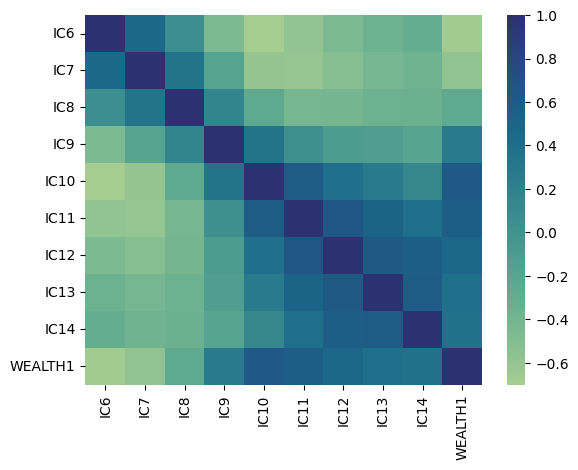

In [316]:
corr = df_wealth.corr()
sns.heatmap(corr, cmap='crest')

In [318]:
# checking if there are any missing values in the columns except for target
df_wealth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95412 entries, 0 to 95411
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   IC6      95412 non-null  int64  
 1   IC7      95412 non-null  int64  
 2   IC8      95412 non-null  int64  
 3   IC9      95412 non-null  int64  
 4   IC10     95412 non-null  int64  
 5   IC11     95412 non-null  int64  
 6   IC12     95412 non-null  int64  
 7   IC13     95412 non-null  int64  
 8   IC14     95412 non-null  int64  
 9   WEALTH1  50680 non-null  float64
dtypes: float64(1), int64(9)
memory usage: 7.3 MB


In [319]:
X_train = df_wealth[df_wealth.WEALTH1.isna()==False]
y_train = X_train.WEALTH1
X_train.drop('WEALTH1', axis=1, inplace=True)

In [320]:
X_test = df_wealth[df_wealth.WEALTH1.isna()==True]
y_test = X_test.WEALTH1
X_test.drop('WEALTH1', axis=1, inplace=True)

In [326]:
classify.fit(X_train,y_train)
classify_pred = classify.predict(X_test)

In [327]:
pd.Series(classify_pred).value_counts()

9.0    6803
2.0    6447
8.0    6072
6.0    4992
4.0    4441
1.0    4343
7.0    3861
5.0    3296
0.0    2659
3.0    1818
Name: count, dtype: int64

In [339]:
null_wealth = df[df.WEALTH1.isna()==True]
null_wealth.WEALTH1 = classify_pred
null_wealth.WEALTH1 

0        5.0
5        7.0
9        5.0
13       6.0
17       2.0
        ... 
95404    0.0
95405    2.0
95407    8.0
95409    3.0
95410    9.0
Name: WEALTH1, Length: 44732, dtype: float64

In [351]:
df.WEALTH1 = df.WEALTH1.fillna(null_wealth.WEALTH1)
df.WEALTH1

0        5.0
1        9.0
2        1.0
3        4.0
4        2.0
        ... 
95407    8.0
95408    9.0
95409    3.0
95410    9.0
95411    8.0
Name: WEALTH1, Length: 95412, dtype: float64

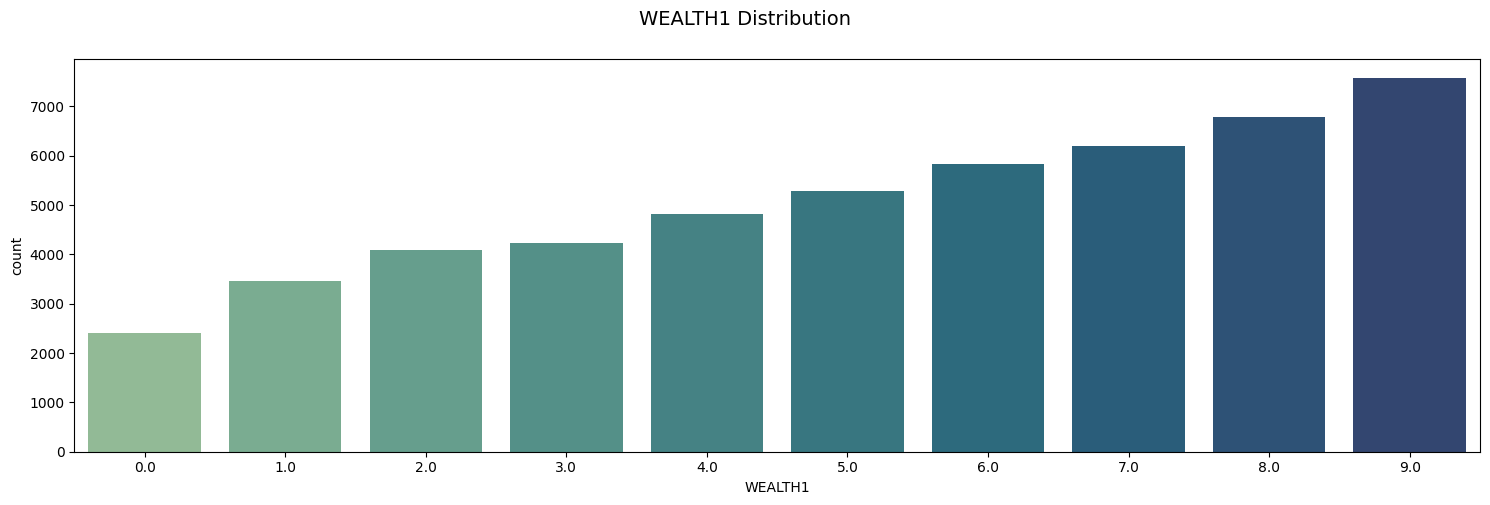

In [352]:
fig = plt.figure(figsize = (15,5))
plt.suptitle("WEALTH1 Distribution", fontsize = 14, y=1)
    
sns.countplot(x = selected.WEALTH1, palette='crest')

plt.tight_layout()
plt.show()

In [353]:
df.WEALTH1.value_counts(normalize=True, dropna=False)

WEALTH1
9.0    0.150799
8.0    0.134836
6.0    0.113371
2.0    0.110384
7.0    0.105427
4.0    0.096958
5.0    0.089884
1.0    0.081719
3.0    0.063462
0.0    0.053159
Name: proportion, dtype: float64